  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2
     label                                            message  length  punct
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 

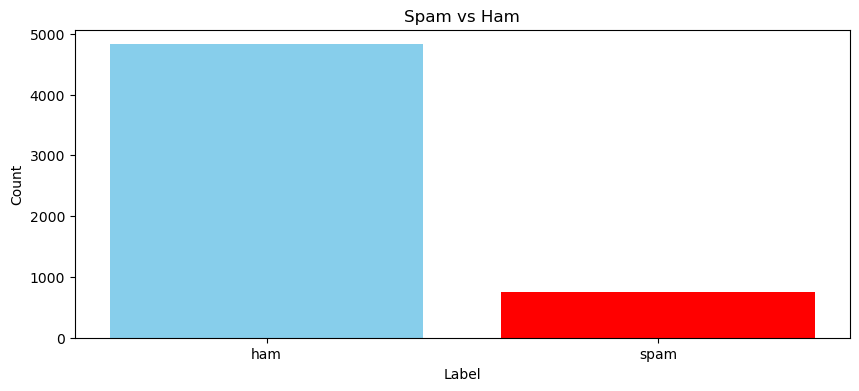

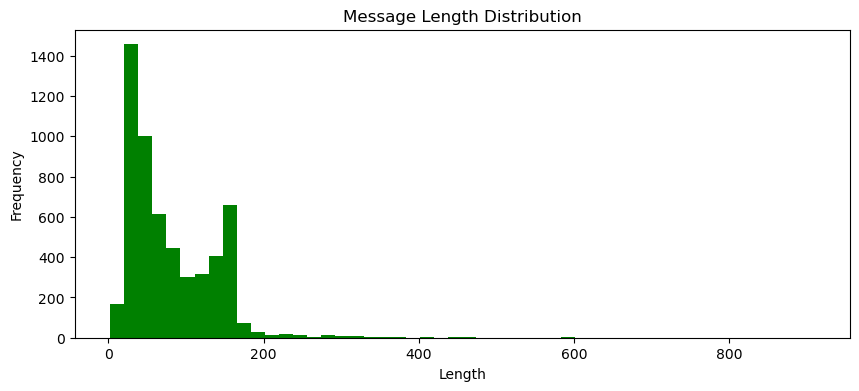

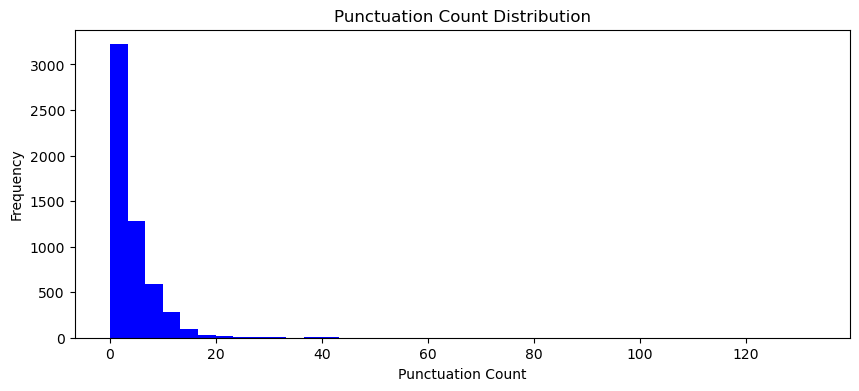

Training size: 3900
Testing size: 1672
Accuracy: 0.8421
Precision: 0.1296
Recall: 0.0312
F1 Score: 0.0504

Classification Report:
              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.13      0.03      0.05       224

    accuracy                           0.84      1672
   macro avg       0.50      0.50      0.48      1672
weighted avg       0.77      0.84      0.80      1672



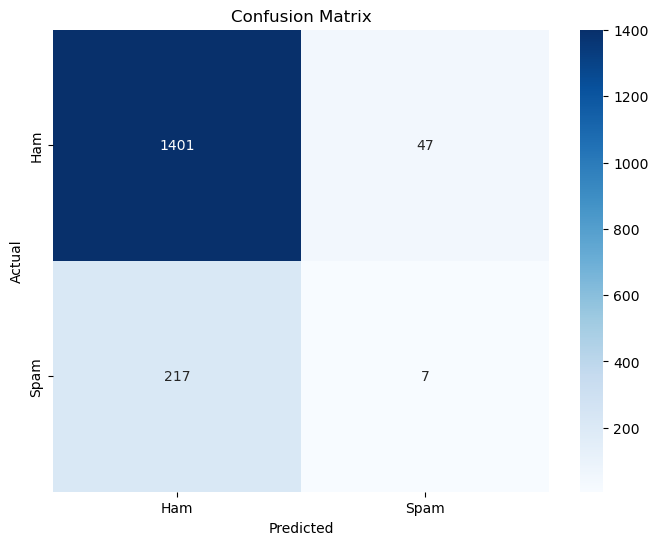


Feature Importance:
  feature  importance
1   punct    0.119867
0  length    0.025891


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv(r"C:\Users\Sahil\Downloads\smsspamcollection (1).tsv", sep='\t')

# Exploratory Data Analysis (keep your existing EDA)
print(df.head())
print(df.tail())
print(df.info())
print(df.isnull().sum())
print(df.describe())

print(df['label'].value_counts())

# Your existing visualizations
counts = df['label'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(counts.index, counts.values, color=['skyblue', 'red'])
plt.title('Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df['length'], bins=50, color='green')
plt.title('Message Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df['punct'], bins=40, color='blue')
plt.title('Punctuation Count Distribution')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.show()

# For classification: Use features to predict 'label' (spam/ham)
X = df[['length', 'punct']]  # Using both numerical features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")

# Logistic Regression for classification
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of spam

# Evaluation metrics for classification
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='spam'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='spam'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='spam'):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,precision_score

In [8]:
df=pd.read_csv(r"C:\Users\Sahil\Downloads\smsspamcollection (1).tsv",sep='\t')

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [12]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [14]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


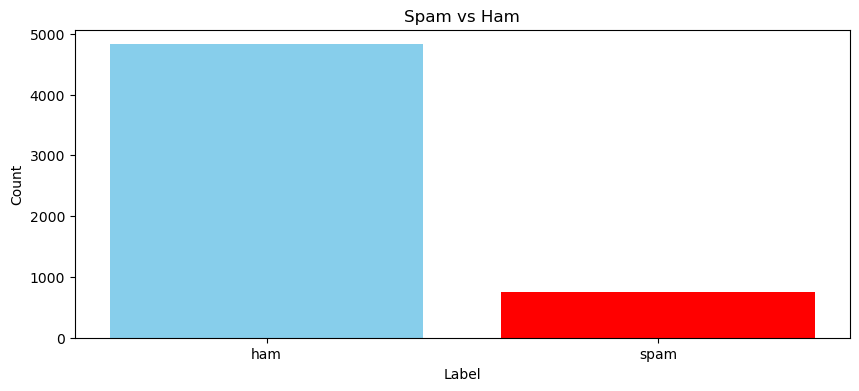

In [15]:
counts = df['label'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(counts.index, counts.values, color=['skyblue', 'red'])
plt.title('Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

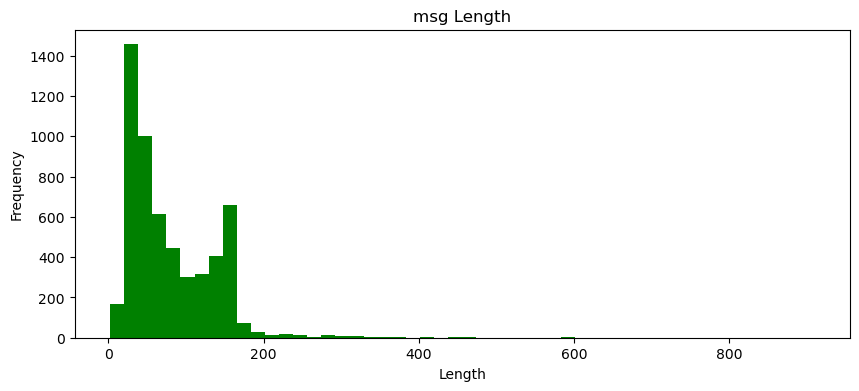

In [16]:
plt.figure(figsize=(10,4))
plt.hist(df['length'],bins=50, color='green')
plt.title('msg Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

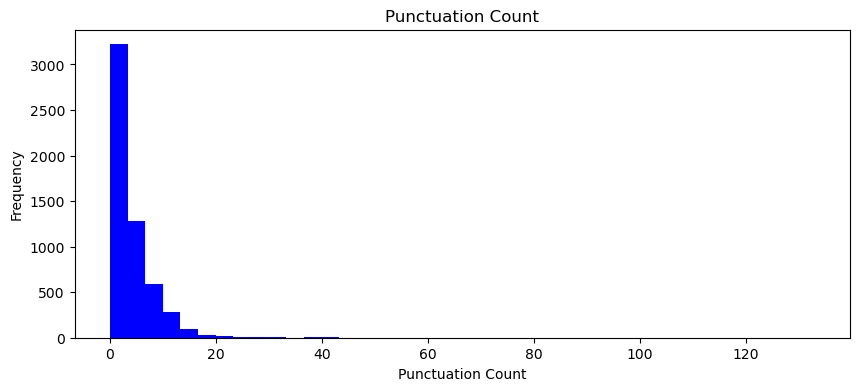

In [17]:
plt.figure(figsize=(10,4))
plt.hist(df['punct'],bins=40, color='blue')
plt.title('Punctuation Count')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.show()

In [18]:
X = df[['punct']]
y = df['length']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training_size: {X_train.shape[0]}")
print(f"Testing_size: {X_test.shape[0]}")

Training_size: 3900
Testing_size: 1672


## I took only this punct column and length cause they are numericals and we don't need label to predict and mesaage to work with simple 



In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 Score: {r2_score(y_test, y_pred):.2f}")
print(f'Mean absolute error: {(mean_absolute_error(y_test,y_pred)):.2f}')

Mean squared error: 2038.60
r2 Score: 0.40
Mean absolute error: 34.74


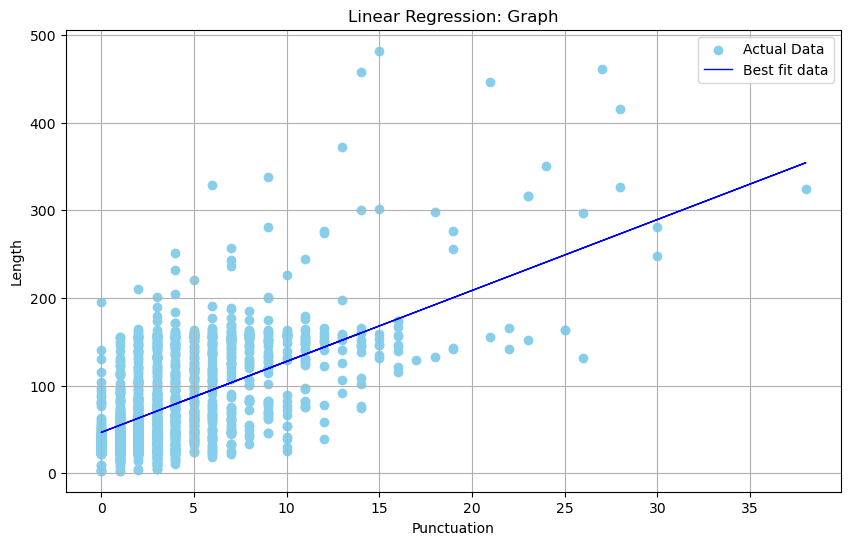

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=1, label='Best fit data')
plt.xlabel('Punctuation')
plt.ylabel('Length')
plt.title('Linear Regression: Graph')
plt.legend()
plt.grid(True)
plt.show()

## One hot encoding isn't needed 

## : Reason is that we don't need more columns it's already small and easy to work with it will create redundant columns when one column is doing work of two columns easily so we don't need it right now if we are said to use so we can uuse otherwise no need of one hot encoding right now 

## In our data we have label as binary categorical column , length is already numerical ,  messages which is a text data and here we don't need one hot encoding , punct is already numerical 
## by seeing our columns we don't need one hot enocoding here that much that'y my view on why not to use one hot encoding 

## accuracy_score,precision_score
--we can't use it cause this in regression because they are used where we have to check which model is better or which packet is better

-- we use accuracy and precsion to check the performance of classification models 

--for regerssion models we use to find the error difference between actual and predicted value by mae,mse,r2 score 